<p style="background-color:#1B3B6F ;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>🚢 Titanic: The Psychology of Survival – A Behavioral & Deep Learning Analysis</b></p>


<b> Other Platforms </b>[🔵📊Kaggle](https://www.kaggle.com/fatimakiraz) | [🔗💼 LinkedIn](https://www.linkedin.com/in/fatimah-nk-datascientist/) | [🐙💻GitHub](https://github.com/Fay-nk) 

#  Titanic - Machine Learning from Disaster

1. **Passenger ID:** it's a unique id for each one.

  **Note:** it can be used to check if there is any duplicates

2. **Survived:** it shows the for each person if they survived (1) or not (0).

3. **Pclass:** it's the passneger classes (1 = 1st, 2 = 2nd, 3 = 3rd).

4. **Name:** every persons name on the ship.

  **NOTE:** we can use the name to take (Mr., Mrs., Miss ...etc), this help us to find to make sure of the class and if they are alone or married.

5. **Sex:** it say the gender of the person.

  **NOTE:** This can help us as it will show what gender had survived more, as it was mentioned they tried to take the femals first, so this also will help us to check the class of the female.

6. **Age:** this give the age of the passneger.

  **NOTE:** this can help us, as it was mentioned the children and seniors were saved first, but also we can check from this the class of the person and if that affected their surviving rate.

7. **Sibsp:** Number of siblings/spouses aboard the Titanic.

8. **Parch:** Number of parents/children aboard the Titanic.

9. **Ticket:** Ticket number.

10. **Fare:** Reflects the price paid for the ticket, which can correlate with social status.

11. **Cabin:** whithout the numbers

  **A Deck:**
    - **Class:** First Class
    - **Location:** Upper deck with luxurious cabins.
    - Passengers in A Deck enjoyed some of the best accommodations on the ship.

  **B Deck:**
    - **Class:** First Class
    - **Location:** Just below A Deck.
    - Also had large, luxurious first-class cabins. Some of the wealthiest passengers were on this deck.

  **C Deck:**
    - **Class:** First Class (some Second Class)
    - **Location:** Below B Deck.
    - Primarily first-class cabins, though some second-class passengers may have had accommodations here.

  **D Deck:**
    - **Class:** First Class and Second Class
    - **Location:** Below C Deck.
    - A mix of first- and second-class passengers. Some common areas for passengers were also located on this deck.

  **E Deck:**
    - **Class:** Second Class (some Third Class)
    - **Location:** Below D Deck.
    - Primarily second-class cabins, but some third-class passengers were also located here.

  **F Deck:**
    - **Class:** Second Class and Third Class
    - **Location:** Below E Deck.
    - Mostly third-class passengers, but some second-class accommodations were also located here. It was closer to the engine room and cargo holds.

  **G Deck:**
    - **Class:** Third Class
    - **Location:** The lowest passenger deck.
    - Almost exclusively third-class passengers, and this deck was closest to the waterline, making evacuation difficult.

  **T Deck:**
    - **Class:** Unclear
    - Note: There is no "T Deck" in historical records of the Titanic. This is likely an error or anomaly in the dataset.

12. **Embarked:** The values in this column indicate the location from which passengers started their journey on the Titanic. These are represented by single-letter codes:
  - **C (Cherbourg, France):** A port city in northern France, Many first-class passengers boarded here.
  - **Q (Queenstown, Ireland):** Located on the southern coast of Ireland, Primarily used by third-class passengers.
  - **S (Southampton, England):** The Titanic's point of departure.
The majority of passengers, including many from all classes, boarded the ship here.


# Import Library

In [1]:
# Importing libraries for EDA
import numpy as np
import pandas as pd
import seaborn as sns

# Importing libraries for Data visulazation
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.subplots as sp
import plotly.figure_factory as ff
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)



#Importing the libraries of (ML, Data preprocessing and evaluation)
# splitting our train and test data
from sklearn.model_selection import train_test_split
# to scale the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# pipeline libraries (will help us to do both MLA bulding, and scaling our data and training the model)
from sklearn.pipeline import Pipeline
# checking our model performance with the libraries bellow
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, log_loss
# for confusion_metrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# for cross validation
from sklearn.model_selection import cross_validate
# for Gridsearch cv
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# for our Roc Auc model figure
from sklearn.metrics import RocCurveDisplay, roc_auc_score, PrecisionRecallDisplay, roc_curve, auc, average_precision_score
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.metrics import get_scorer_names
from yellowbrick.classifier import ROCAUC

# importing Boosting libraries
import xgboost as xgb
from xgboost import XGBClassifier


# math library
import math

# to dump the data
import pickle

# Read Data

In [2]:
df_titanic = pd.read_csv("train.csv").copy()

# To avoid mistakes being applied to the original data we use (.copy())

In [3]:
df_titanic.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex    Age  SibSp  \
0                            Braund, Mr. Owen Harris    male 22.000      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1   
2                             Heikkinen, Miss. Laina  female 26.000      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.000      1   
4                           Allen, Mr. William Henry    male 35.000      0   

   Parch            Ticket   Fare Cabin Embarked  
0      0         A/5 21171  7.250   NaN        S  
1      0          PC 17599 71.283   C85        C  
2      0  STON/O2. 3101282  7.925   NaN        S  
3      0            113803 53.100  C123        S  
4      0            373450  8.050   NaN        S

# Data Preperation

In [4]:
def separate_columns(df_titanic):
    categorical_cols = df_titanic.select_dtypes(include=['object', 'category'])
    numerical_cols = df_titanic.select_dtypes(include=['number'])
    return categorical_cols, numerical_cols

categorical_cols, numerical_cols = separate_columns(df_titanic)

In [5]:
categorical_cols.head(1)

Name   Sex     Ticket Cabin Embarked
0  Braund, Mr. Owen Harris  male  A/5 21171   NaN        S

In [6]:
numerical_cols.head(1)

PassengerId  Survived  Pclass    Age  SibSp  Parch  Fare
0            1         0       3 22.000      1      0 7.250

## Checking the null values

**Notes:** having null values will not effect the XGBoost so we will only check them and not change anything if we want.

In [7]:
categorical_cols.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [8]:
numerical_cols.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

## Create new features

In [9]:
# Family Size column

df_titanic['FamilySize'] = df_titanic['SibSp'] + df_titanic['Parch'] + 1 # +1 includes the passenger
df_titanic['FamilySize']

# Larger family sizes could indicate different survival chances than those traveling alone.

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [10]:
df_titanic['FamilySize'].value_counts()

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

**NOTES:**
- if the family size is 1 it means that they dont have any family, and as notes they have 537 alone.
- we can use this infor as a new column.
- also we can delete the not neccessary columns (Sibsp, Parch)

In [11]:
# from that we can create a column to see if the are alone or were with family 

df_titanic['IsAlone'] = df_titanic['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
df_titanic['IsAlone']

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: IsAlone, Length: 891, dtype: int64

In [12]:
df_titanic['IsAlone'].value_counts()

# Almost more then half of the passengers are alone

IsAlone
1    537
0    354
Name: count, dtype: int64

In [13]:
# Creating the Title column from the name

df_titanic['Title'] = df_titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_titanic['Title']

# From the Name column, extract titles (Mr., Mrs., Miss, etc.), which provide information about social status and gender.
# You can then group rare titles (e.g., 'Lady', 'Countess') into a new category called 'Other.'

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [14]:
df_titanic['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [15]:
# Creating fare per person column

df_titanic['FarePerPerson'] = df_titanic['Fare'] / df_titanic['FamilySize']
df_titanic['FarePerPerson']

0      3.625
1     35.642
2      7.925
3     26.550
4      8.050
       ...  
886   13.000
887   30.000
888    5.862
889   30.000
890    7.750
Name: FarePerPerson, Length: 891, dtype: float64

In [16]:
# Creating PClass fare

df_titanic['Pclass_Fare'] = df_titanic['Pclass'] * df_titanic['Fare']
df_titanic['Pclass_Fare']

0     21.750
1     71.283
2     23.775
3     53.100
4     24.150
       ...  
886   26.000
887   30.000
888   70.350
889   30.000
890   23.250
Name: Pclass_Fare, Length: 891, dtype: float64

In [17]:
df_titanic['Pclass_Fare'].value_counts()

Pclass_Fare
26.000    44
24.150    43
23.687    38
52.000    36
23.250    34
          ..
25.963     1
25.300     1
24.000     1
23.188     1
31.550     1
Name: count, Length: 247, dtype: int64

In [18]:
# Creating Deck column

df_titanic['Deck'] = df_titanic['Cabin'].str[0]
df_titanic['Deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Deck, Length: 891, dtype: object

In [19]:
df_titanic['Deck'].value_counts()

Deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

- as the deck was explain in the project introductions, this effect the class of the person.

In [20]:
# Creating sex_pclass column

df_titanic['Sex_Pclass'] = df_titanic['Sex'] + '_' + df_titanic['Pclass'].astype(str)
df_titanic['Sex_Pclass']

0        male_3
1      female_1
2      female_3
3      female_1
4        male_3
         ...   
886      male_2
887    female_1
888    female_3
889      male_1
890      male_3
Name: Sex_Pclass, Length: 891, dtype: object

In [21]:
df_titanic['Sex_Pclass'].value_counts()

Sex_Pclass
male_3      347
female_3    144
male_1      122
male_2      108
female_1     94
female_2     76
Name: count, dtype: int64

In [22]:
# Creating Ticket Group Size

df_titanic['TicketGroupSize'] = df_titanic.groupby('Ticket')['Ticket'].transform('count')
df_titanic['TicketGroupSize']

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketGroupSize, Length: 891, dtype: int64

In [23]:
df_titanic['TicketGroupSize'].value_counts()

TicketGroupSize
1    547
2    188
3     63
4     44
7     21
6     18
5     10
Name: count, dtype: int64

The Ticket feature can be used to estimate group size by counting how many passengers share the same ticket number. Passengers with the same ticket likely traveled together.

In [24]:
# lets categorize the age 

def categorize_age(age):

    if age < 13:
        return 'Child'
    elif 13 <= age < 18:
        return 'Teenager'
    elif 18 <= age < 60:
        return 'Adult'
    else:
        return 'Senior'

# Applying the function to create a new column 'AgeGroup'
df_titanic['AgeGroup'] = df_titanic['Age'].apply(categorize_age)

# Display the first few rows to check the new AgeGroup column
print(df_titanic[['Age', 'AgeGroup']].head())


     Age AgeGroup
0 22.000    Adult
1 38.000    Adult
2 26.000    Adult
3 35.000    Adult
4 35.000    Adult


In [25]:
df_titanic['AgeGroup'].value_counts()

AgeGroup
Adult       575
Senior      203
Child        69
Teenager     44
Name: count, dtype: int64

## Deleting the unecessary columns

In [26]:
print ("my original data columns:", df_titanic.columns)

# Drop the specified columns
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
data_dropped = df_titanic.drop(columns=columns_to_drop, inplace = True)

print ("\n after dropping the extra columns data columns:", df_titanic.columns)


my original data columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'Title', 'FarePerPerson', 'Pclass_Fare', 'Deck', 'Sex_Pclass',
       'TicketGroupSize', 'AgeGroup'],
      dtype='object')

 after dropping the extra columns data columns: Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'FamilySize', 'IsAlone', 'Title', 'FarePerPerson', 'Pclass_Fare',
       'Deck', 'Sex_Pclass', 'TicketGroupSize', 'AgeGroup'],
      dtype='object')


## Encoding

In [27]:
# now we can check the the new columns
def separate_columns(df_titanic):
    categorical_cols = df_titanic.select_dtypes(include=['object', 'category'])
    numerical_cols = df_titanic.select_dtypes(include=['number'])
    return categorical_cols, numerical_cols

categorical_cols, numerical_cols = separate_columns(df_titanic)

In [28]:
categorical_cols.columns


Index(['Sex', 'Embarked', 'Title', 'Deck', 'Sex_Pclass', 'AgeGroup'], dtype='object')

In [29]:
numerical_cols.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Fare', 'FamilySize',
       'IsAlone', 'FarePerPerson', 'Pclass_Fare', 'TicketGroupSize'],
      dtype='object')

In [30]:
df_titanic.Sex.unique()

array(['male', 'female'], dtype=object)

In [31]:
# Encoding the Sex column
# Apply the mapping

df_titanic['Sex'] = df_titanic['Sex'].map({'male': 0, 'female': 1})

In [32]:
df_titanic['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [33]:
# Encoding the Embarked column
df_titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

- according to the project information above we can encode the Embarked column like this:
1. **C:** as 1 since mostly they have first class
2. **Q:** as 2 since its 3rd primarly
3. **S:** as 0 since it is mixed, and it is the place they took off from

In [34]:
df_titanic['Embarked'].isnull().sum()

2

In [35]:
# before encoding we need to fill the null values to unkown
df_titanic['Embarked'] = df_titanic['Embarked'].fillna('U')

In [36]:
# Map values to integers
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2, 'U': 3}  # Including 'U' for Unknown
df_titanic['Embarked'] = df_titanic['Embarked'].map(embarked_mapping).astype('int')

In [37]:
df_titanic['Embarked'].value_counts()

Embarked
0    644
1    168
2     77
3      2
Name: count, dtype: int64

In [38]:
# now we can check the the new columns
def separate_columns(df_titanic):
    categorical_cols = df_titanic.select_dtypes(include=['object', 'category'])
    numerical_cols = df_titanic.select_dtypes(include=['number'])
    return categorical_cols, numerical_cols

categorical_cols, numerical_cols = separate_columns(df_titanic)
categorical_cols.columns

Index(['Title', 'Deck', 'Sex_Pclass', 'AgeGroup'], dtype='object')

In [39]:
df_titanic['Deck'].isnull().sum()

687

In [40]:
# to encode the deck column we need to fill the null values
df_titanic['Deck'] = df_titanic['Deck'].fillna('U')

# and we change T to U because there is no T Deck
df_titanic['Deck'].replace('T', 'U',inplace = True)

print ("value before the encoding: ",df_titanic['Deck'].value_counts())

value before the encoding:  Deck
U    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: count, dtype: int64


In [41]:
# Map values to integers
embarked_mapping = {'U': 0, 'A': 1, 'B': 2, 'C': 3,'D': 4, 'E': 5, 'F': 6, 'G': 7}  # Including 'U' for Unknown
df_titanic['Deck'] = df_titanic['Deck'].map(embarked_mapping).astype('int')
print ("value after the encoding: ",df_titanic['Deck'].value_counts())

value after the encoding:  Deck
0    688
3     59
2     47
4     33
5     32
1     15
6     13
7      4
Name: count, dtype: int64


In [42]:
df_titanic.AgeGroup.unique()

array(['Adult', 'Senior', 'Child', 'Teenager'], dtype=object)

In [43]:
# Map values to integers
embarked_mapping = {'Child': 1, 'Teenager': 2, 'Adult': 3,'Senior': 4}  # Including 'U' for Unknown
df_titanic['AgeGroup'] = df_titanic['AgeGroup'].map(embarked_mapping).astype('int')
print ("value after the encoding: ",df_titanic['AgeGroup'].value_counts())

value after the encoding:  AgeGroup
3    575
4    203
1     69
2     44
Name: count, dtype: int64


## Checking for any duplicates

In [44]:
def duplicate_values(df_titanic):
    # Print a message indicating the start of the duplicate check process
    print("Duplicate check...")

    # Count the number of duplicated rows in the DataFrame
    num_duplicates = df_titanic.duplicated(subset=None, keep='first').sum()

    # Check if there are any duplicates
    if num_duplicates > 0:
        # If duplicates are found, print the number of duplicated observations
        print("There are", num_duplicates, "duplicated observations in the dataset.")

        # Drop the duplicated rows from the DataFrame, keeping the first occurrence
        df_titanic.drop_duplicates(keep='first', inplace=True)

        # Print the number of duplicates that were removed
        print(num_duplicates, "duplicates were dropped!")

        # Confirm that there are no more duplicate rows
        print("No more duplicate rows!")
    else:
        # If no duplicates are found, print a message indicating this
        print("There are no duplicated observations in the dataset.")

duplicate_values(df_titanic)

# We applied the drop function here since our dataset lacks any unique values required for identification,
# and we do not anticipate duplication in this dataset.
# Because the dataset corresponds to feature inputs (e.g., digit recognition or sensor readings),
# the existence of duplicate rows is likely to be wasteful or non-informative,
# therefore removing them results in a cleaner dataset without hurting the analysis.

Duplicate check...
There are no duplicated observations in the dataset.


# Exploratory Data Analysis (EDA)

In [45]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Sex              891 non-null    int64  
 4   Age              714 non-null    float64
 5   Fare             891 non-null    float64
 6   Embarked         891 non-null    int32  
 7   FamilySize       891 non-null    int64  
 8   IsAlone          891 non-null    int64  
 9   Title            891 non-null    object 
 10  FarePerPerson    891 non-null    float64
 11  Pclass_Fare      891 non-null    float64
 12  Deck             891 non-null    int32  
 13  Sex_Pclass       891 non-null    object 
 14  TicketGroupSize  891 non-null    int64  
 15  AgeGroup         891 non-null    int32  
dtypes: float64(4), int32(3), int64(7), object(2)
memory usage: 101

In [46]:
df_titanic.describe().T

count    mean     std   min     25%     50%     75%     max
PassengerId     891.000 446.000 257.354 1.000 223.500 446.000 668.500 891.000
Survived        891.000   0.384   0.487 0.000   0.000   0.000   1.000   1.000
Pclass          891.000   2.309   0.836 1.000   2.000   3.000   3.000   3.000
Sex             891.000   0.352   0.478 0.000   0.000   0.000   1.000   1.000
Age             714.000  29.699  14.526 0.420  20.125  28.000  38.000  80.000
Fare            891.000  32.204  49.693 0.000   7.910  14.454  31.000 512.329
Embarked        891.000   0.368   0.648 0.000   0.000   0.000   1.000   3.000
FamilySize      891.000   1.905   1.613 1.000   1.000   1.000   2.000  11.000
IsAlone         891.000   0.603   0.490 0.000   0.000   1.000   1.000   1.000
FarePerPerson   891.000  19.916  35.841 0.000   7.250   8.300  23.667 512.329
Pclass_Fare     891.000  51.543  51.578 0.000  23.687  28.500  58.000 512.329
Deck            891.000   0.768   1.573 0.000   0.000   0.000   0.000   7.000
TicketGroupSize 891.000   1.788   1.361 1.000   1.000   1.000   2.000   7.000
AgeGroup        891.000   3.024   0.766 1.000   3.000   3.000   3.000   4.000

**According to the outputs above:**

1. The dataset haa s total of 891 entries and 16 colusmn (since our dataset is not more than 9k - 10k, we can use XGBoost here as considered the best model in our case)
2. our target feature is "survived" and the other columns are the features we encodtocan use the numerical in the XGBoost.
3. We converted the majority of the columns to be an int or a float.
4. The dataset has no missing , as we dealt with before, and even if it had a null value, it would not affect our boosting methods, as the null values would not anot effect its performance. 
5. also we can see that the Age column has less than the other vawhich, that means areere is some alll vlaues in it.
6. By checking the descriptive code, we can easily see the mean is above, we can easily see the mean number is above the std. when the standard deviation is not close to or greater thaneragethe avg. (mean), it strongly indicates there art no ourliers but we saw some columns like (sex, fare, Embarked, Fareperperson, Deck) give us some difference which proves that we have some outliers.
7. We examined iwerethere is any dsplicated and we saw theree is non.

## Data visualiazation

### Data distribution

In [47]:
df_titanic.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

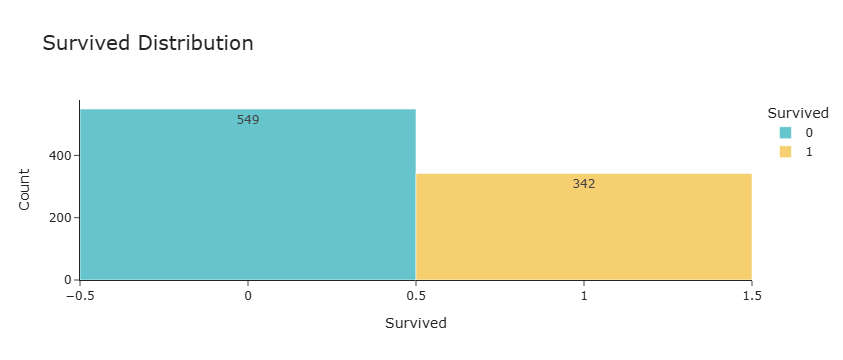

In [48]:
# Our data is not balanced we can check with this data visualization below
# Create a count plot for the 'Survived' column
fig = px.histogram(df_titanic, x='Survived', color='Survived',
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   title="Survived Distribution",
                   labels={'Survived': 'Survived'},
                   text_auto=True)  # Add counts on the bars

# Customize layout for better readability
fig.update_layout(
    xaxis_title="Survived",
    yaxis_title="Count",
    template="simple_white",  # Clean white background template
    title_font_size=20
)

# Show the figure
fig.show()


The figure above shows us that the target value is not balanced

### Checking for Outliers

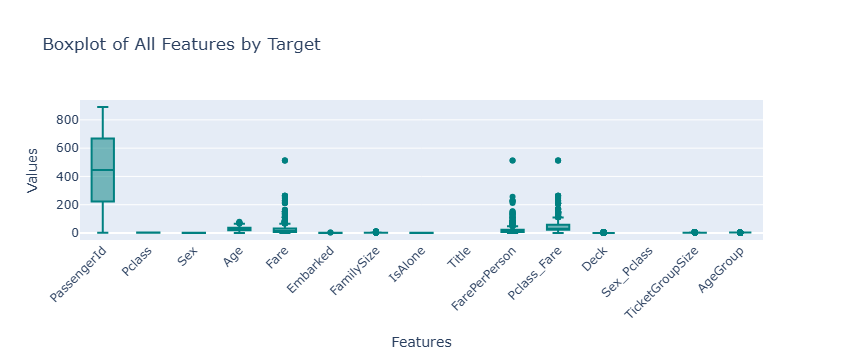

In [49]:
# let's see the existence of outliers for each feature in our dataset.

# Exclude 'Survived' column
df_features = df_titanic.drop('Survived', axis=1)

# Convert DataFrame to long format for Plotly boxplot
df_long = df_features.melt(var_name='Feature', value_name='Value')

# Create a Plotly box plot
fig = px.box(df_long, x='Feature', y='Value', title='Boxplot of All Features by Target',
             color_discrete_sequence=['Teal'])

# Adjust layout for better appearance
fig.update_layout(xaxis_title='Features', yaxis_title='Values',
                  xaxis_tickangle=-45, height=600)

# Show the plot
fig.show()


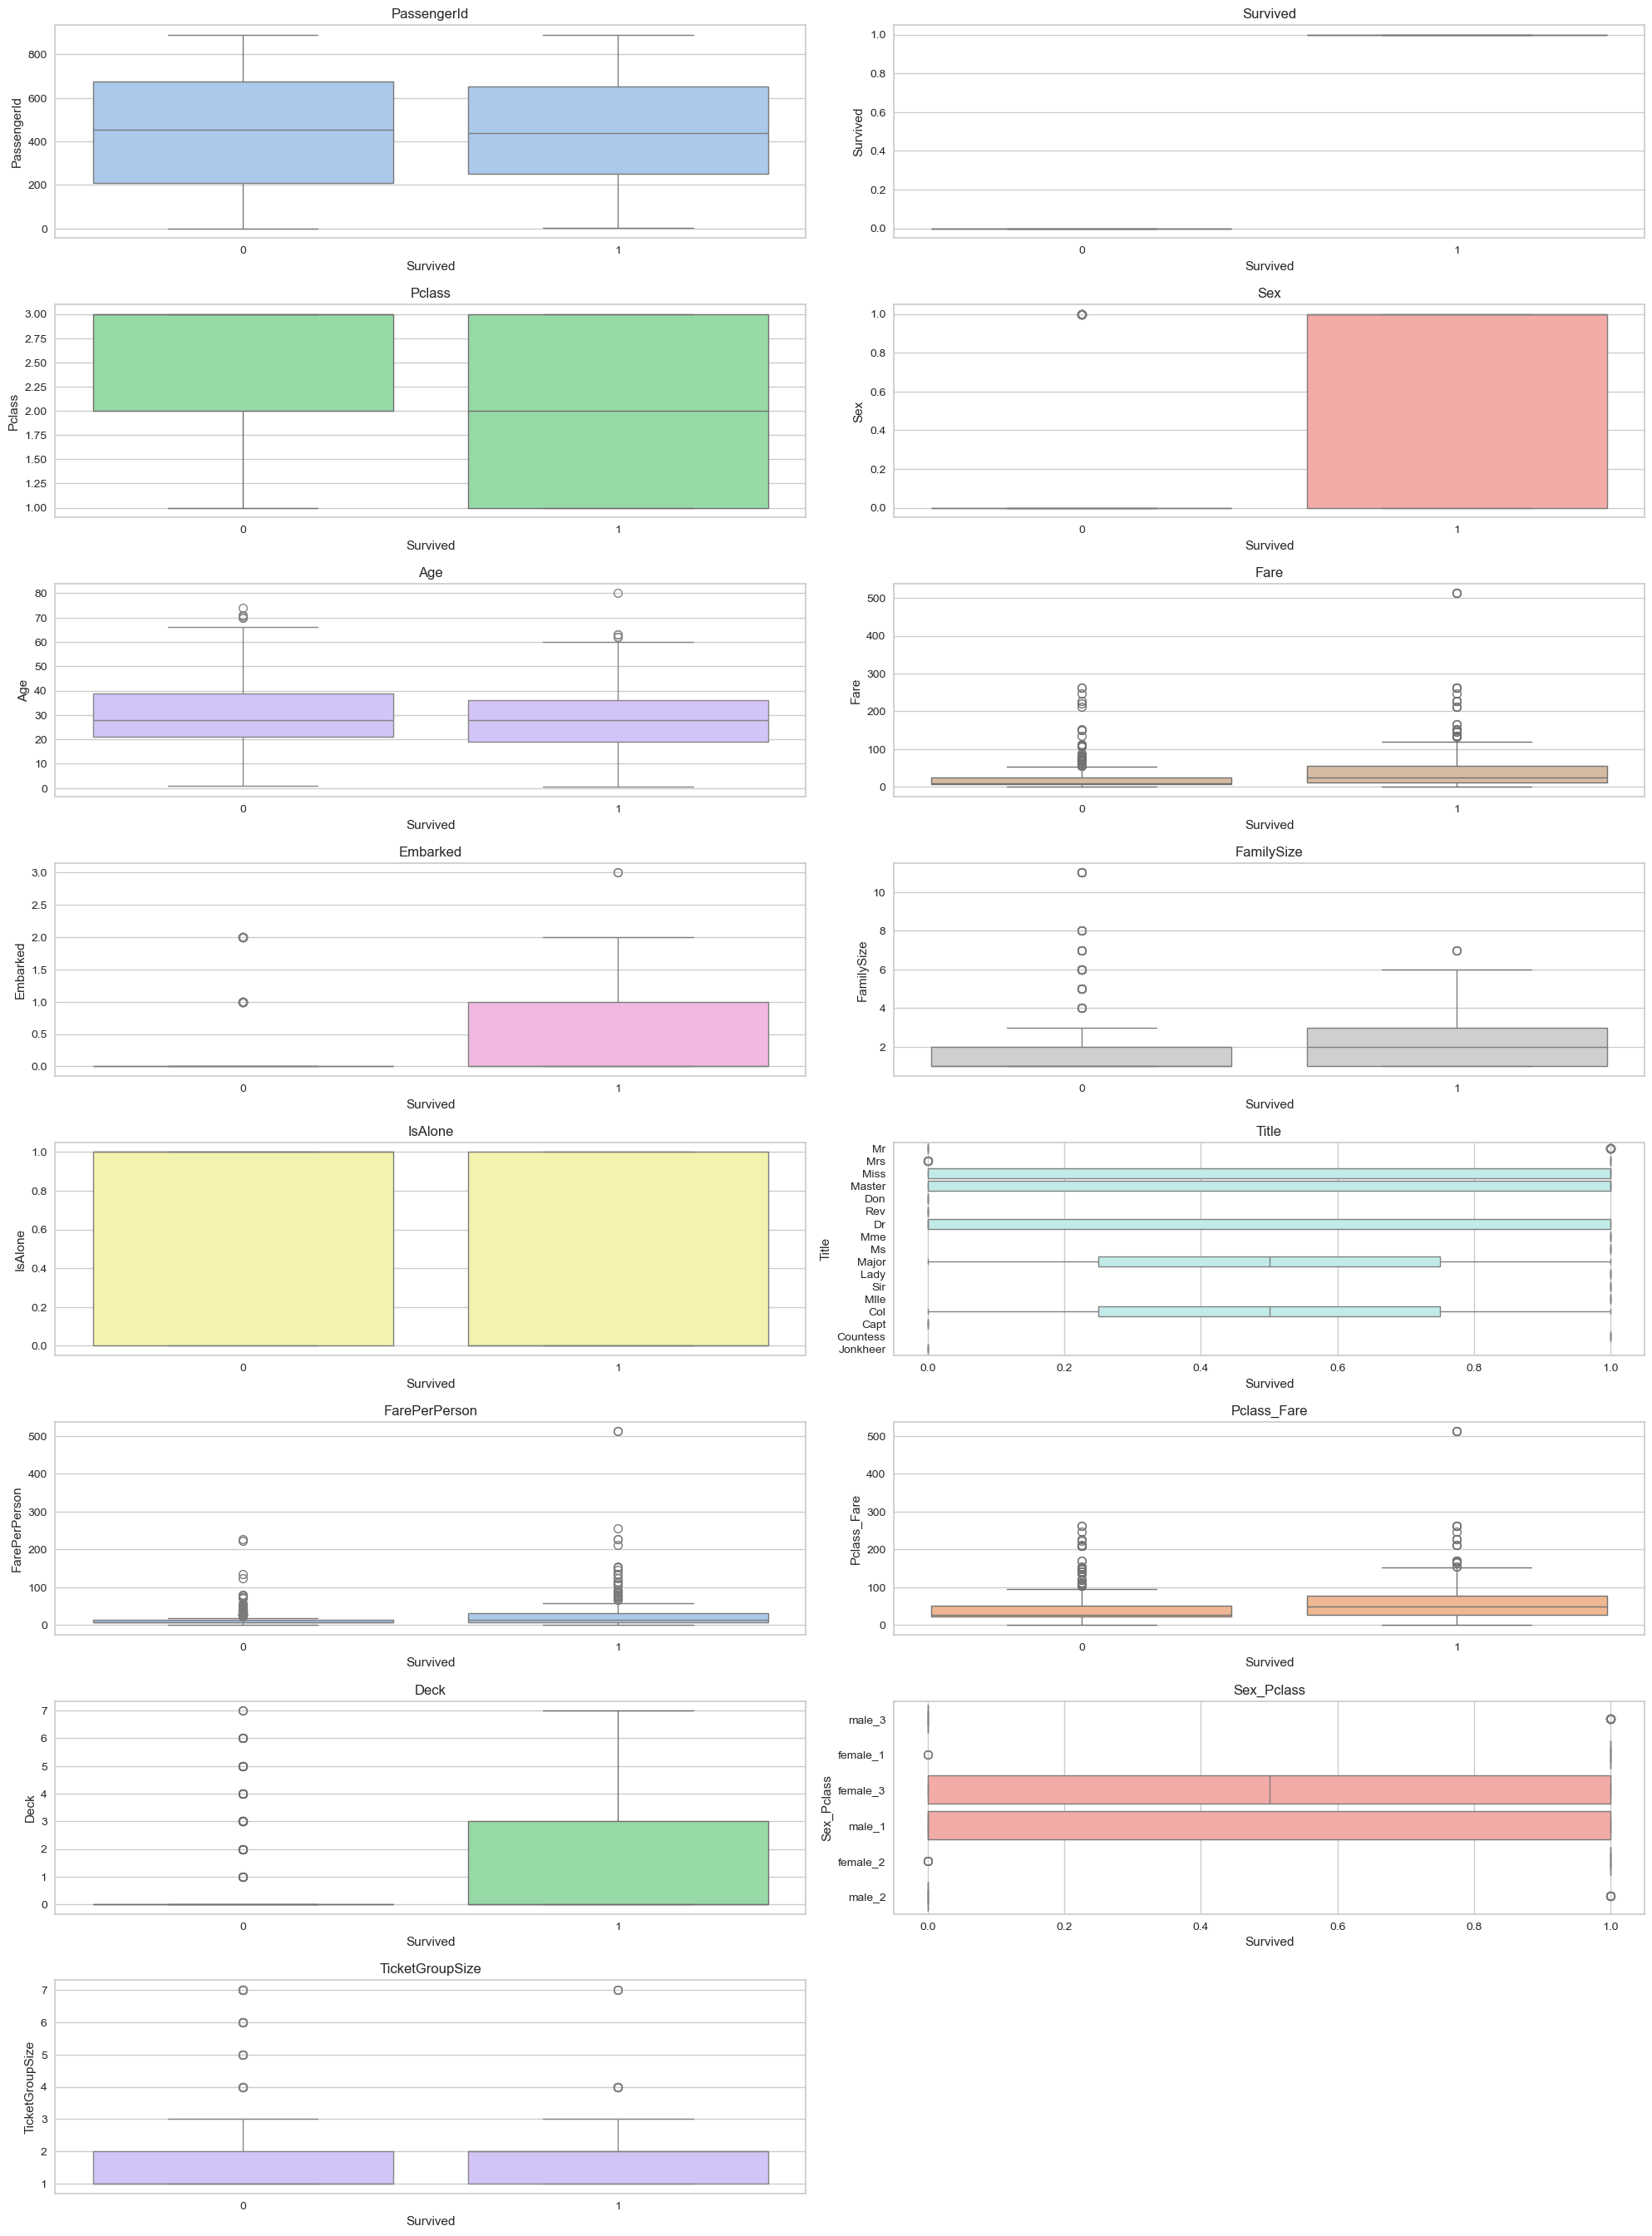

In [50]:
# Define a pastel color palette
pastel_colors = sns.color_palette("pastel", len(df_titanic.columns[:-1]))

# Create boxplots for all features with individual pastel colors
plt.figure(figsize=(20, 30))

for i, col in enumerate(df_titanic.columns[:-1], 1):  # Skip 'class' column
    plt.subplot(9, 2, i)  # Arrange the plots in 9 rows and 2 columns
    plt.title(col)

    # Create a boxplot for each feature
    sns.boxplot(x='Survived', y=col, data=df_titanic, color=pastel_colors[i-1])

plt.tight_layout()
plt.show()


**According to the figures above:**
- We can observe that our features include a diverse set of data values. This suggests that the data points and features are more diverse.
- The graphic indicates that certain values in these features have outliers in the overall distribution.
- While most features have fairly symmetric boxplots, a handful have notable asymmetry, indicating skewness in the distribution.

### Correlation

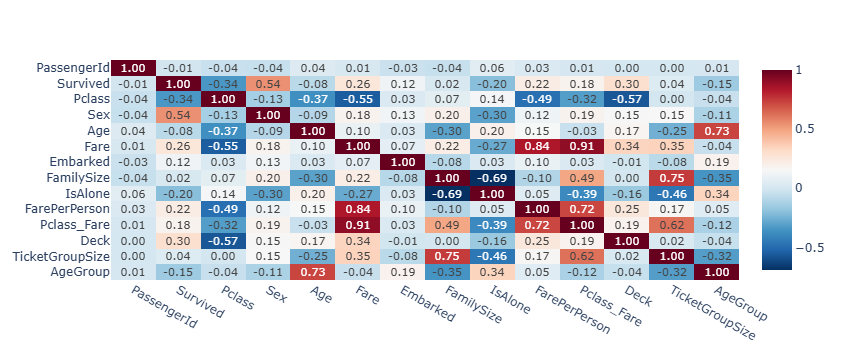

In [51]:
import plotly.express as px  # Importing the Plotly Express library for data visualization

corr_matrix = df_titanic.select_dtypes('number').corr()  # Calculating the correlation matrix of the DataFrame df_titanic

# Creating a heatmap to visualize the correlation matrix
fig = px.imshow(corr_matrix,
                text_auto='.2f',  # Displaying correlation values with two decimal places
                aspect="auto",  # Automatically adjusting the aspect ratio of the heatmap
                color_continuous_scale='RdBu_r')  # Setting the color scale to a diverging red-blue scale
fig.show()  # Displaying the heatmap

# maybe we can drop the last columns as they have the least effect on our table

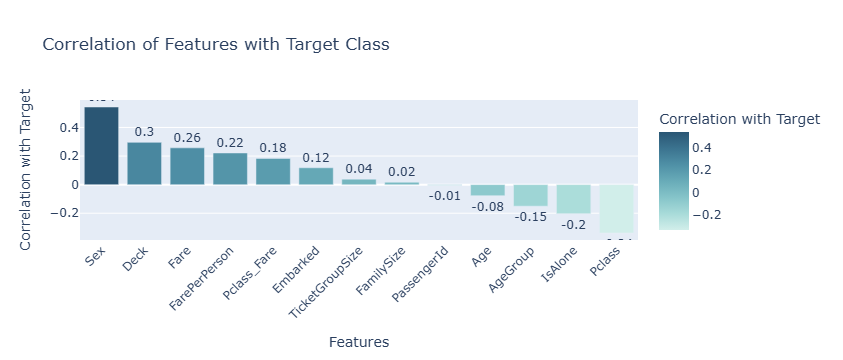

In [52]:
# let's check the correlation of the features with the target

# Calculate correlation matrix
correlation_matrix = df_titanic.select_dtypes('number').corr()

# Get correlation with the 'Survived' column and sort in descending order
correlation_with_target = correlation_matrix['Survived'].drop('Survived').sort_values(ascending=False).reset_index()

# Rename columns for better readability
correlation_with_target.columns = ['Feature', 'Correlation']

# Create a Plotly bar chart
fig = px.bar(correlation_with_target,
             x='Feature',
             y='Correlation',
             title='Correlation of Features with Target Class',
             labels={'Feature': 'Features', 'Correlation': 'Correlation with Target'},
             text=correlation_with_target['Correlation'].round(2),
             color='Correlation',  # Color bars based on correlation value
             color_continuous_scale=px.colors.sequential.Teal)  # Apply a color scale

# Customize the appearance
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45, height=600)

# Show the plot
fig.show()


**According to the correlations figures above:**
1. The sex column has the highest positive correlation (0.54), indicating a strong linear relationship with the Survived target.
2. The p-class column has the lowest negative correlation (-0.34), suggesting an inverse relationship with the Survived target.
3. Some features, such as PassengerID, and FamilySize have correlations close to zero, indicating they have little to no linear impact on the Survived target variable.

### features skweness and disturtion

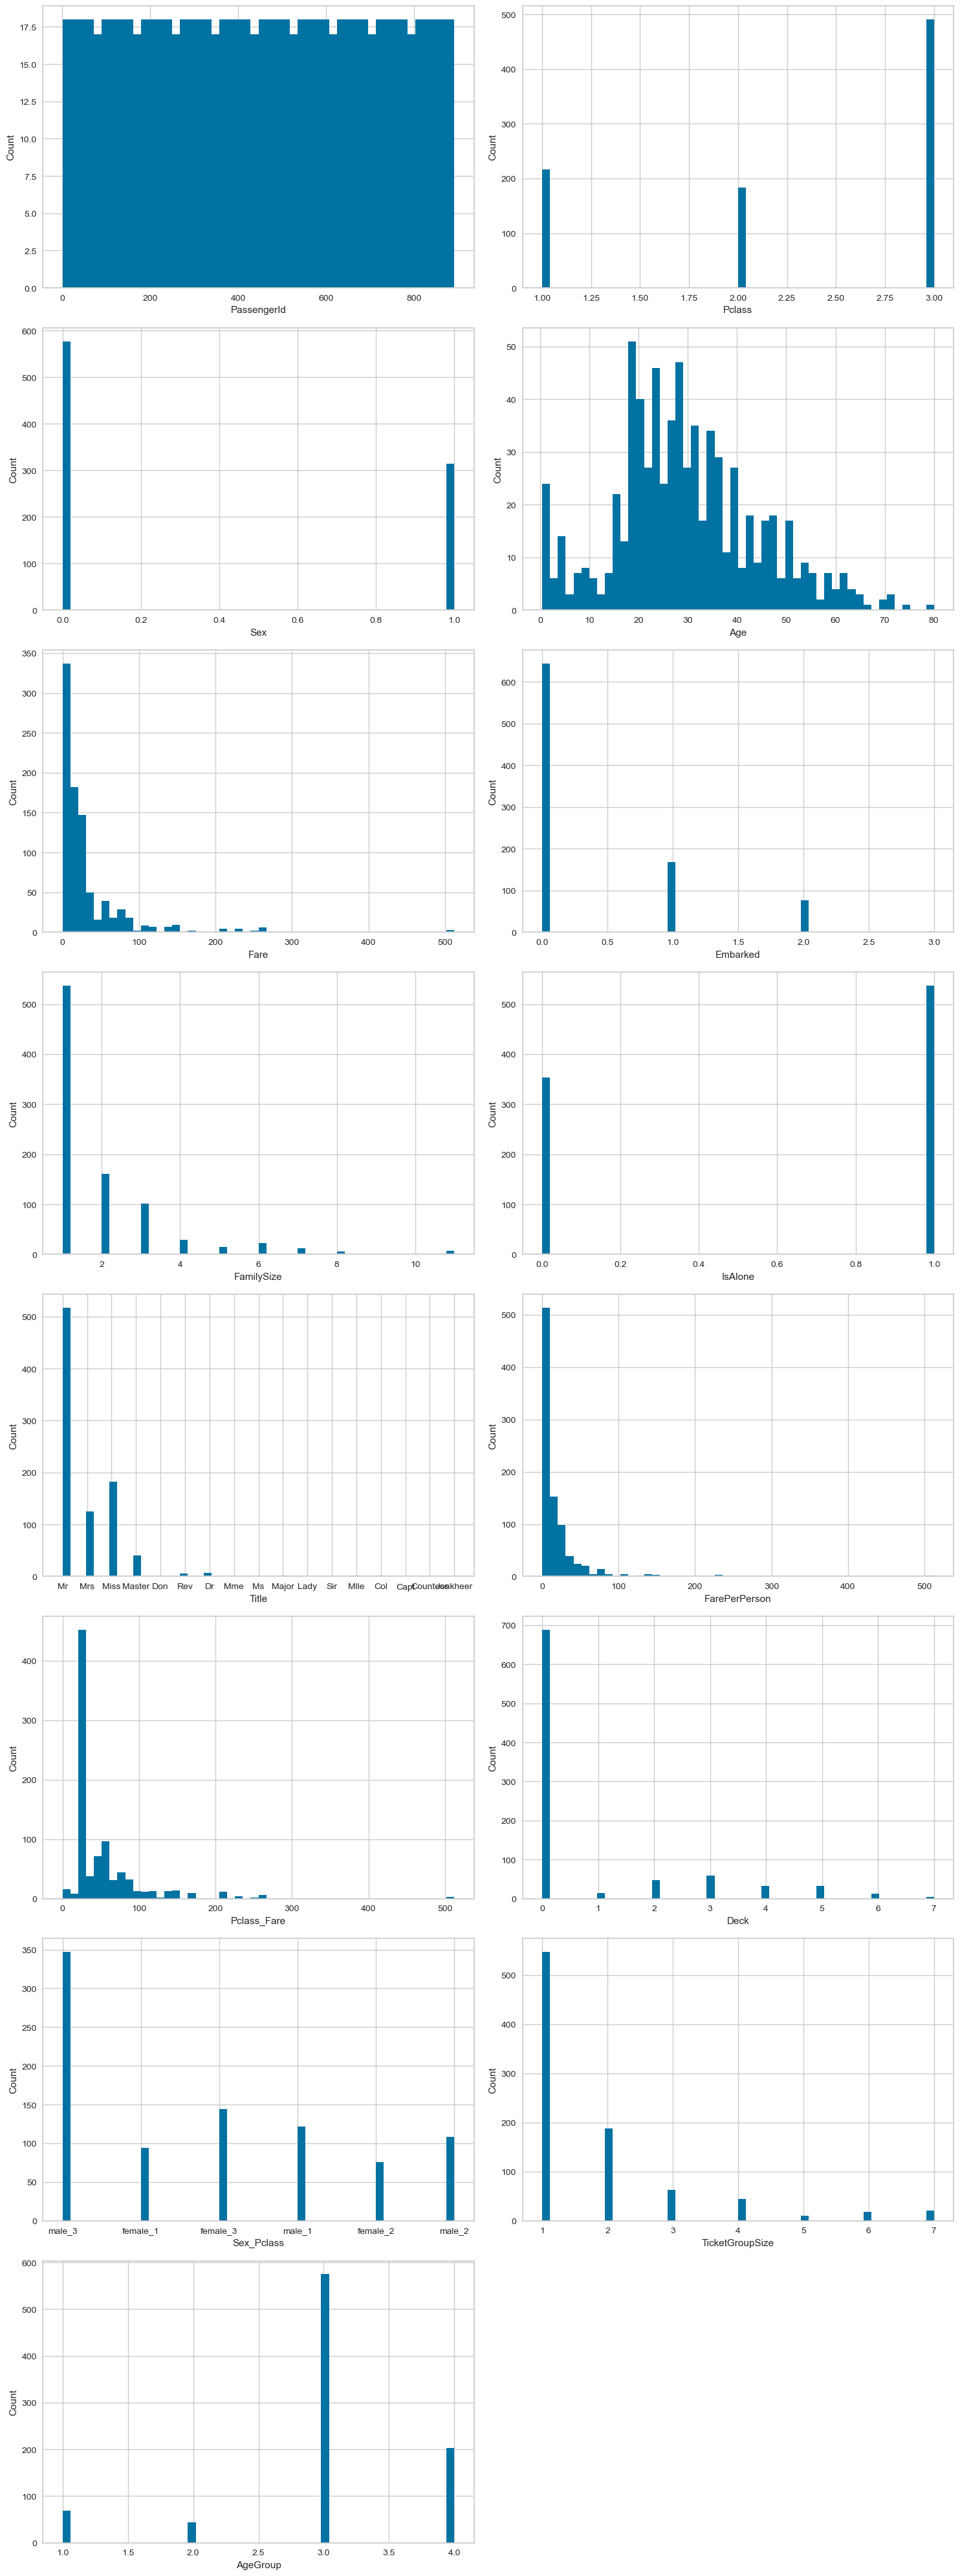

In [53]:
# List of features to plot
features = df_titanic.drop('Survived', axis=1).columns

# Determine the number of rows and columns based on the number of features
num_features = len(features)
num_cols = 2
num_rows = math.ceil(num_features / num_cols)

plt.figure(figsize=(15, num_rows * 5))

# Iterate over the features and plot histograms
for i, feature in enumerate(features, 1):
    plt.subplot(num_rows, num_cols, i)
    df_titanic[feature].hist(bins=50)
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


**From the figure above we can notice**
- The density plots reveal that many features have several peaks, indicating the presence of various subgroups in the data. Some attributes are skewed, and the range of values varies between them. The presence of negative numbers indicates unique data features or manipulations. Overall, the dataset is complicated, which may present modeling issues.

### features effect on target

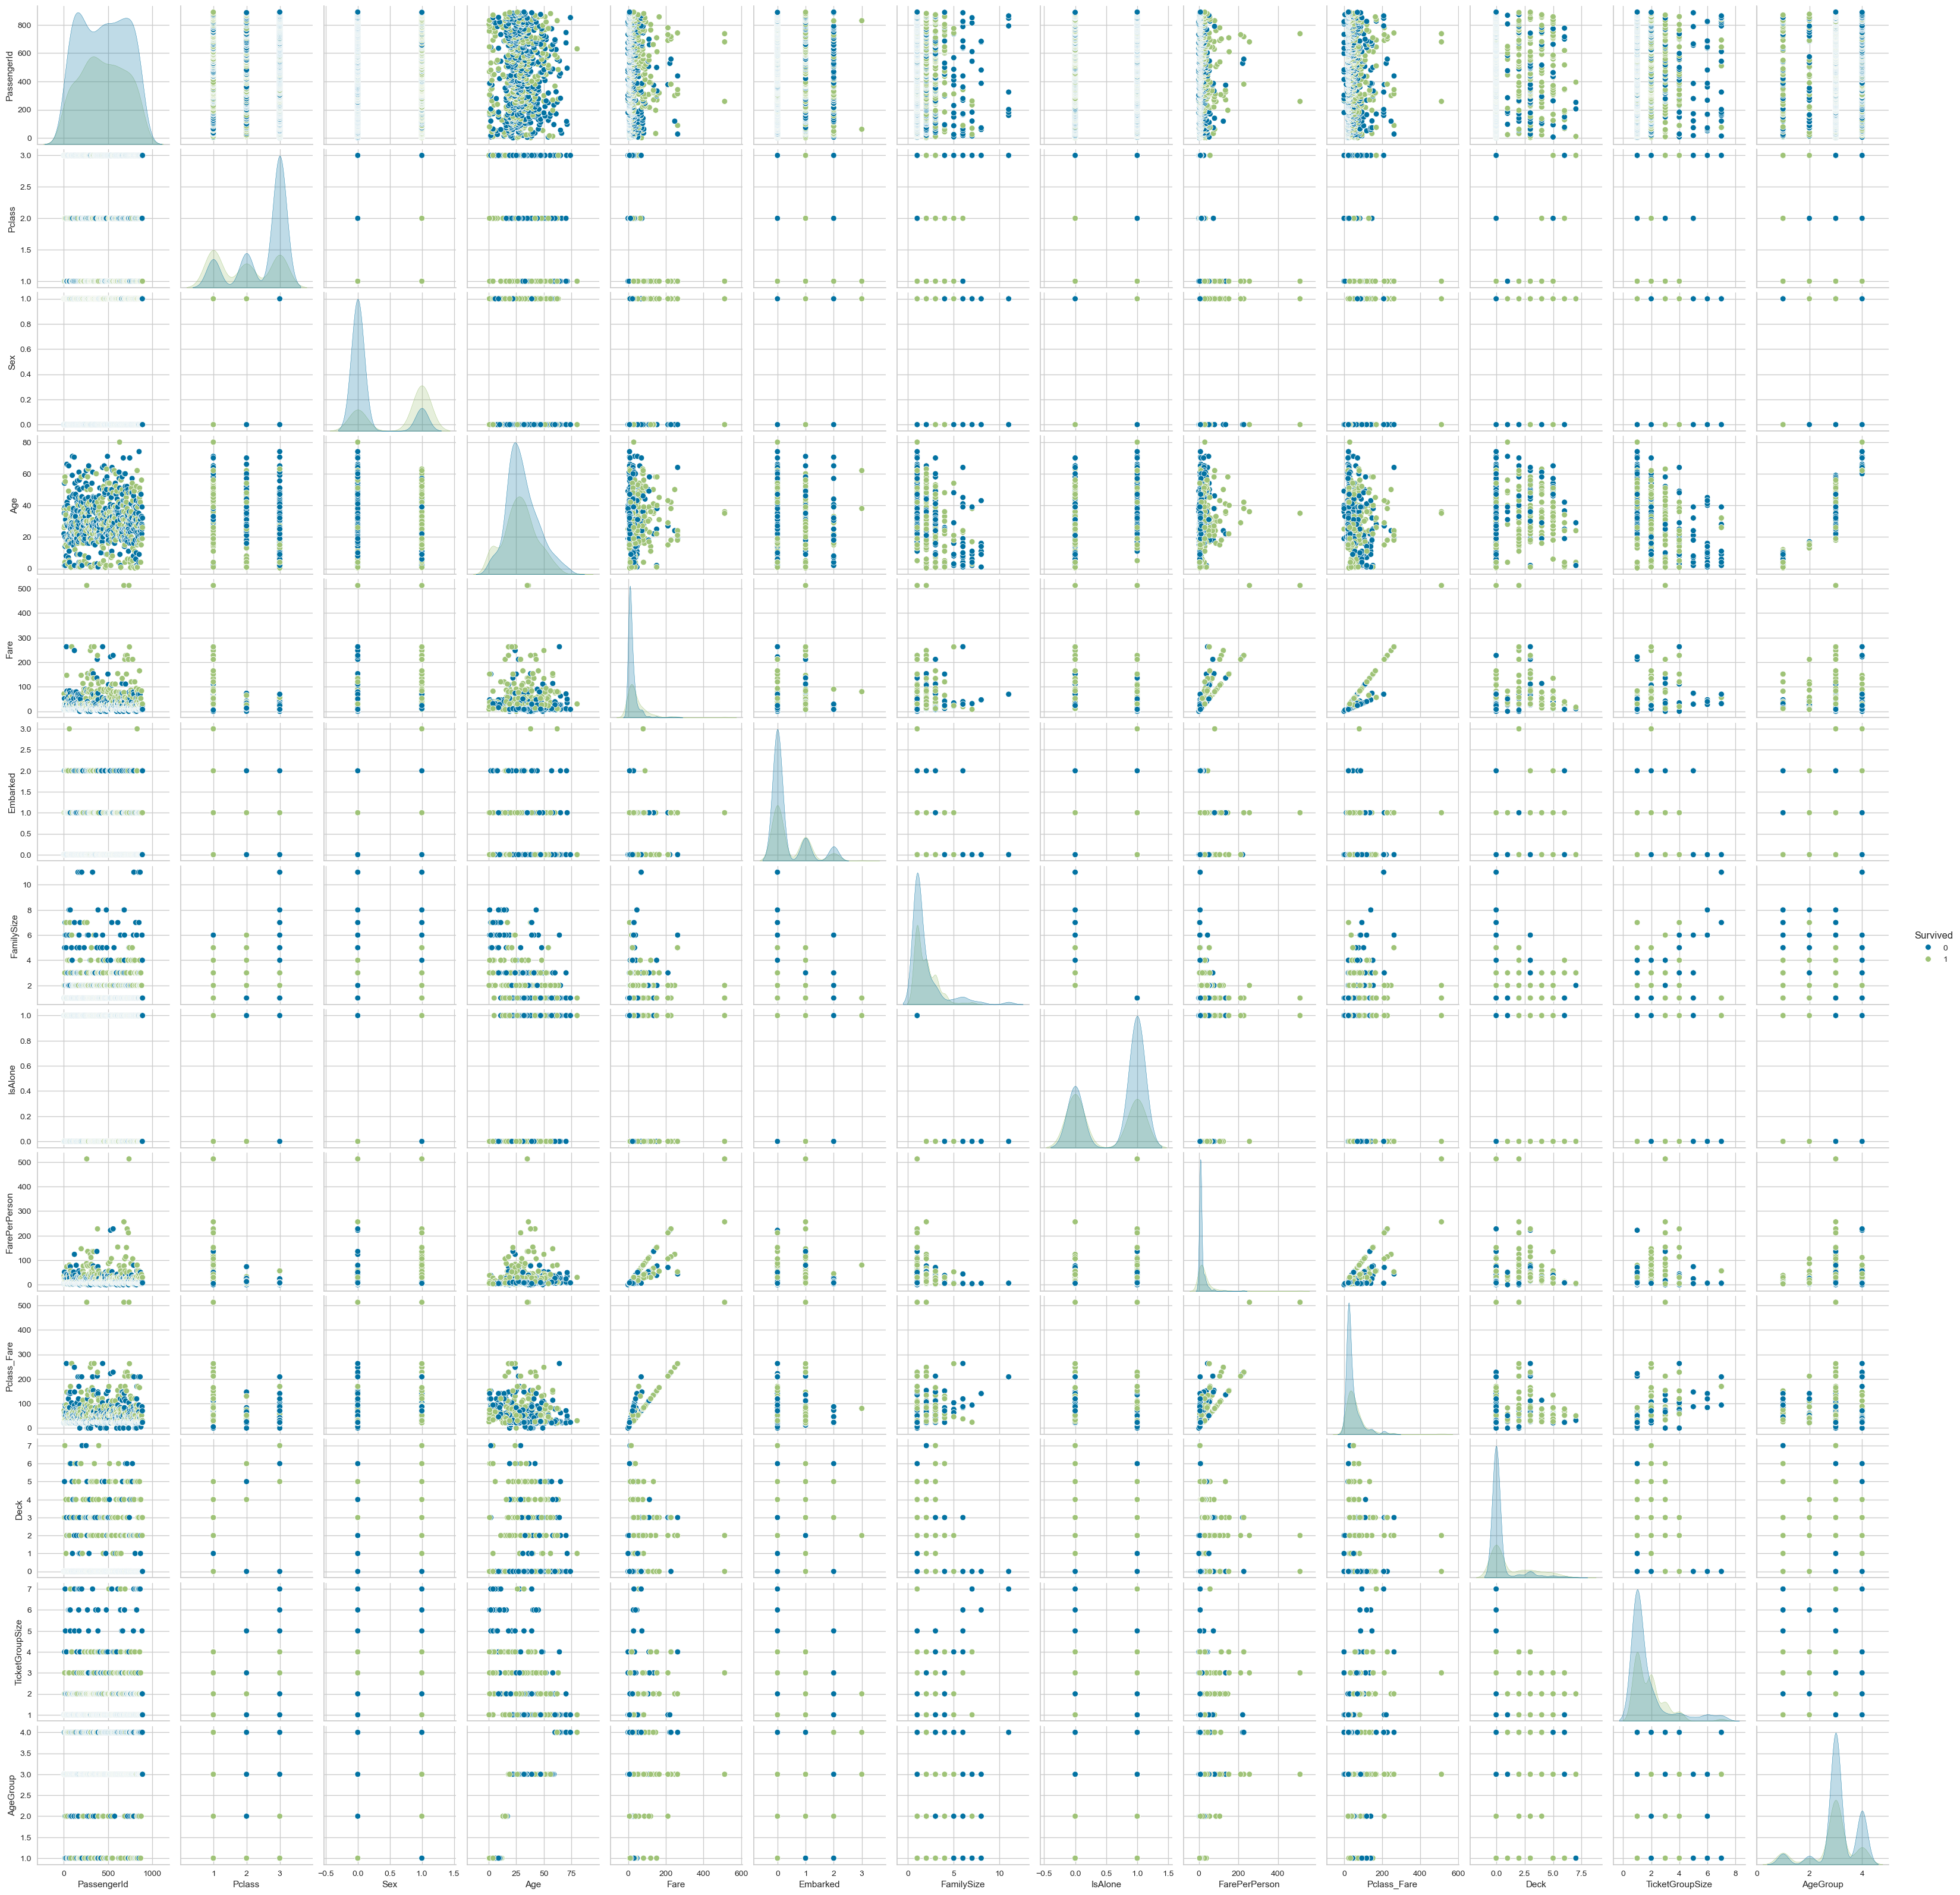

In [54]:
sns.pairplot(df_titanic, hue='Survived');

we can see some features have a direct impact on the target like Sex, Fare, Deck and Ticket Group size

### Some Features and Survived people

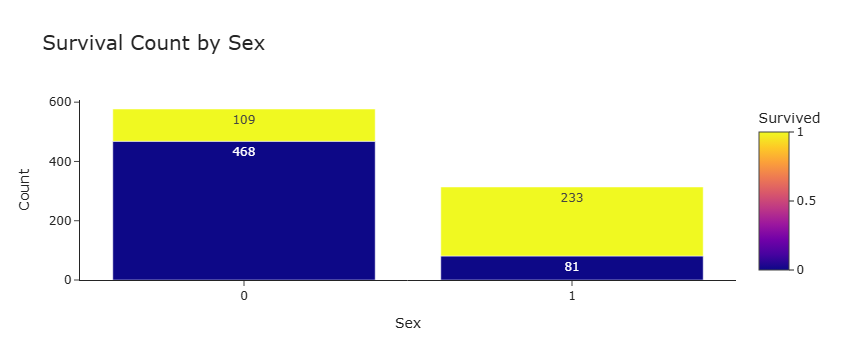

In [55]:

# Group the data by 'Sex' and 'Survived' and count the occurrences
grouped_data = df_titanic.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

# Create a bar plot with Plotly to visualize the count of each group
fig = px.bar(grouped_data,
             x='Sex',
             y='Count',
             color='Survived',
             barmode='group',  # Show bars side by side for each 'Sex'
             text='Count',     # Display the count on the bars
             title='Survival Count by Sex')

# Customize the layout for better visualization
fig.update_layout(
    xaxis_title="Sex",
    yaxis_title="Count",
    title_font_size=20,
    template="simple_white"
)

# Show the figure
fig.show()


**From the figure above:**
1. we can check that our female sex (1) has more survived than the male (0) as survived.
2. we can also see that the male were more than the female in the ship

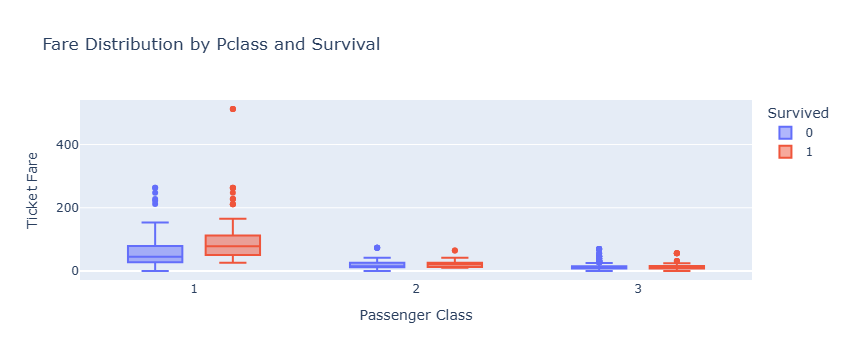

In [56]:
# Between person class, the fare price and survived
fig = px.box(df_titanic, x='Pclass', y='Fare', color='Survived',
             title='Fare Distribution by Pclass and Survival',
             labels={'Pclass': 'Passenger Class', 'Fare': 'Ticket Fare'})
fig.show()


**From the figure above**
1. we can see that the 1st class has the most distribution among our data also they had the highest ticket rates, as shown from the figure it has the highest price of the ticket, and the most likely that they will survive.
2. The 2nd class and 3rd class had almost similar distribution so we can be sure that the ticket has a higher ticket fare but the survival rate are similar between these classes.

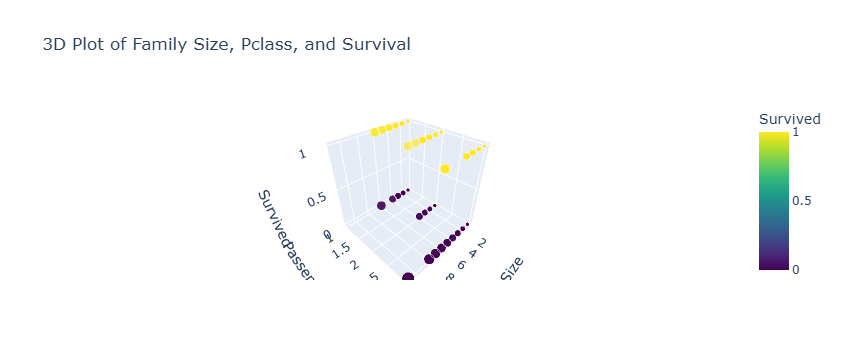

In [57]:

# Create a 3D scatter plot to show the relationship between FamilySize, Pclass, and Survived
fig = px.scatter_3d(df_titanic, x='FamilySize', y='Pclass', z='Survived',
                    color='Survived', size='FamilySize', 
                    title='3D Plot of Family Size, Pclass, and Survival',
                    labels={'FamilySize': 'Family Size', 'Pclass': 'Passenger Class', 'Survived': 'Survived'},
                    color_continuous_scale=px.colors.sequential.Viridis)

# Show the plot
fig.show()


**From the Figure above we can notice:**
1. family with a larger number of members and in the 3rd class they mostly didn't survive
2. with that the 2nd and 1st classes is not the same is the total opposite as the people who survived have the largest family members

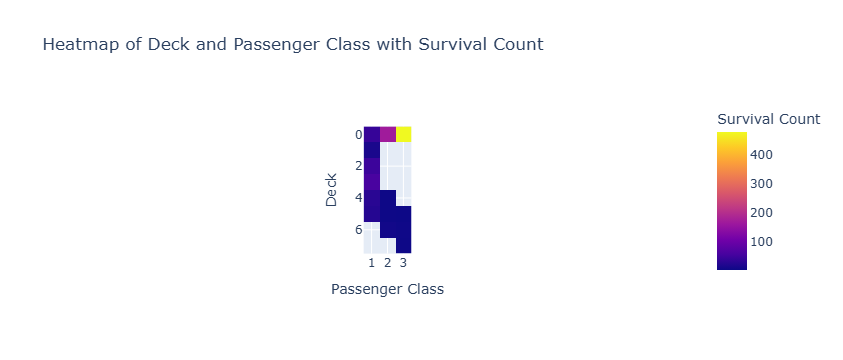

In [58]:


# Create a new DataFrame for the heatmap
# Group by Deck, Pclass, and Survived, then count the occurrences for each combination
heatmap_data = df_titanic.groupby(['Deck', 'Pclass', 'Survived']).size().reset_index(name='Count')

# Create a heatmap
fig = px.imshow(
    heatmap_data.pivot_table(index='Deck', columns='Pclass', values='Count', aggfunc='sum'),
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Heatmap of Deck and Passenger Class with Survival Count',
    labels={'x': 'Passenger Class', 'y': 'Deck', 'color': 'Survival Count'}
)

# Show the plot
fig.show()


**Notes for the figure above:**
1. Deck 0 is the unknown the 1 is the 1st and goes down to the last deck 8.
2. we can see the survival count are mostly from the upper class and who were in the first few deck

In [59]:
df_titanic.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [60]:
# to make a visual for the title and survived people we can do some chnages to the title names

# Create a mapping for titles
title_mapping = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Mlle': 'Mrs',
    'Don': 'Noble',
    'Sir': 'Noble',
    'Jonkheer': 'Noble',
    'Lady': 'Noble',
    'Countess': 'Noble',
    'Rev': 'Officer',
    'Dr': 'Officer',
    'Major': 'Officer',
    'Col': 'Officer',
    'Capt': 'Officer'
}

# Apply the title mapping to the 'Title' column
df_titanic['Title'] = df_titanic['Title'].map(title_mapping)

# Check the updated title categories
print(df_titanic['Title'].value_counts())


Title
Mr         517
Miss       183
Mrs        128
Master      40
Officer     18
Noble        5
Name: count, dtype: int64


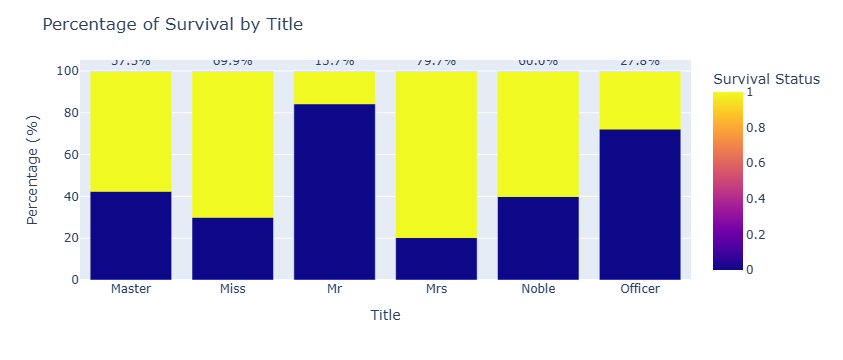

In [61]:
import plotly.express as px

# Group by Title and Survived, then count the occurrences
title_survival_counts = df_titanic.groupby(['Title', 'Survived']).size().reset_index(name='Count')

# Calculate the total count per Title
total_counts = title_survival_counts.groupby('Title')['Count'].transform('sum')

# Calculate the percentage
title_survival_counts['Percentage'] = (title_survival_counts['Count'] / total_counts) * 100

# Create a bar plot to visualize the percentages of survival by Title
fig = px.bar(
    title_survival_counts, 
    x='Title', 
    y='Percentage', 
    color='Survived',
    barmode='group',
    color_discrete_map={0: 'red', 1: 'green'},
    labels={'Title': 'Title', 'Percentage': 'Percentage (%)', 'Survived': 'Survival Status'},
    text='Percentage'
)

# Update layout to show percentages on bars
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')

# Update layout for better readability
fig.update_layout(xaxis_title='Title', yaxis_title='Percentage (%)', title='Percentage of Survival by Title')

# Show the plot
fig.show()


**NOTES:**
**Notes from the figure above:**
1. the highest rates of survivals are mostly to female than male, even though the male were more on the ship.
2. the 2nd highest are the nobels as they have a first class it is obviuse that they will be saved first.
3. the 3rd highest group are the master which indicate to young boys, also means that young ages have more survived rates more than the last rate which are the officers and Mr. which shows the 3rd classed have the lowest survival rate.

**Grouping of Titles:**
- 'Ms': Can be grouped with 'Miss'.
- 'Mme', 'Mlle': both are French forms of Miss/Mrs
- 'Don', 'Sir', 'Jonkheer': Group as 'Noble' (nobility or high-ranking males).
- 'Lady', 'Countess': Group as 'Noble' (nobility or high-ranking females).
- 'Rev', 'Dr', 'Major', 'Col', 'Capt': Group as 'Officer' (military or professionals).
- 'Don', 'Sir', 'Rev', 'Dr', 'Major', 'Col', 'Capt': Can also be grouped as 'Special'.
- 'Master': Can be kept as it specifically refers to young boys.

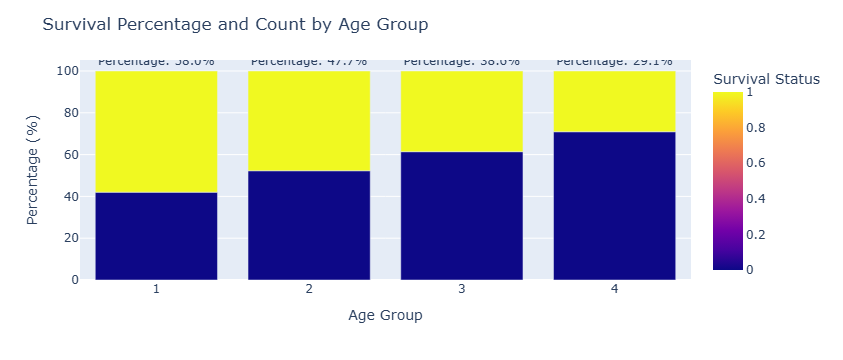

In [62]:
import plotly.express as px
import pandas as pd

# Sample data (replace this with your actual dataframe)
# df_titanic = pd.read_csv('path_to_your_data.csv')

# Group by AgeGroup and Survived to count the occurrences
age_survival_counts = df_titanic.groupby(['AgeGroup', 'Survived']).size().reset_index(name='Count')

# Calculate the total count per AgeGroup
total_counts = age_survival_counts.groupby('AgeGroup')['Count'].transform('sum')

# Calculate the percentage
age_survival_counts['Percentage'] = (age_survival_counts['Count'] / total_counts) * 100

# Combine Count and Percentage into one text column
age_survival_counts['Text'] = age_survival_counts.apply(
    lambda row: f"Count: {row['Count']}<br>Percentage: {row['Percentage']:.1f}%",
    axis=1
)

# Create a bar plot to visualize the counts and percentages of survival by AgeGroup
fig = px.bar(
    age_survival_counts,
    x='AgeGroup',
    y='Percentage',
    color='Survived',
    barmode='group',
    color_discrete_map={0: 'red', 1: 'green'},
    labels={'AgeGroup': 'Age Group', 'Percentage': 'Percentage (%)', 'Survived': 'Survival Status'},
    text='Text'  # Use the combined text column for annotation
)

# Update layout to show both counts and percentages on bars
fig.update_traces(
    texttemplate='%{text}',  # Use the combined text
    textposition='outside'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Percentage (%)',
    title='Survival Percentage and Count by Age Group'
)

# Show the plot
fig.show()


**Notes from the figure above:**
1. the children (1) and the teenagers (2) have the lowest count (which means they are the least of the people that are on the ship)
2. The children (1) have the highest percentage of survival after that comes the teenagers (2) this can be associated with the fact that they don't occupy a lot of the people who were on the ship.
3. the adults (3) come after that to the survival rate, then the seniors (4), even though the seniors must have more higher percentage of survival yet considering their age it is possible that they have a lower rate.
4. also note that we don't have all the age ranges, as we have some missing data.

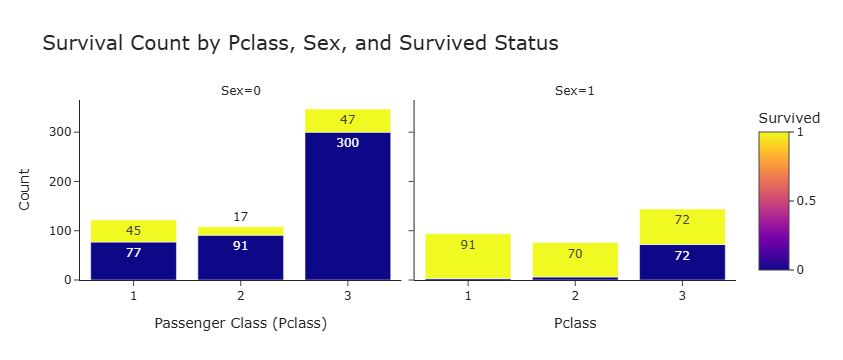

In [63]:
import plotly.express as px

# Group the data by 'Pclass', 'Sex', and 'Survived' and count the occurrences
grouped_data = df_titanic.groupby(['Pclass', 'Sex', 'Survived']).size().reset_index(name='Count')

# Create a bar plot with Plotly to visualize the relationship
fig = px.bar(grouped_data,
             x='Pclass',
             y='Count',
             color='Survived',
             facet_col='Sex',  # Split the data by 'Sex'
             barmode='group',  # Group the bars for each 'Survived' status
             text='Count',     # Display the count on the bars
             title='Survival Count by Pclass, Sex, and Survived Status')

# Customize the layout for better visualization
fig.update_layout(
    xaxis_title="Passenger Class (Pclass)",
    yaxis_title="Count",
    title_font_size=20,
    template="simple_white"
)

# Show the figure
fig.show()


**Notes from the figure above:**
1. the highest survival rate is assisted with the female sex (1).
2. the 1st class in the female have a higher rate of surviving than the other classes, yet the 3rd class is more than the 2nd, also we can see that the amount of the 3rd is more than the 1st and 2nd classes.
3. the males (0) have more counts than the females (1) in general.
4. the 3rd class in the male have the highest rate of surviving considering to the other class, then the 1st class. with that, we can notice the difference is very small between them.
5. the 2nd class has the lowest rate of survival.

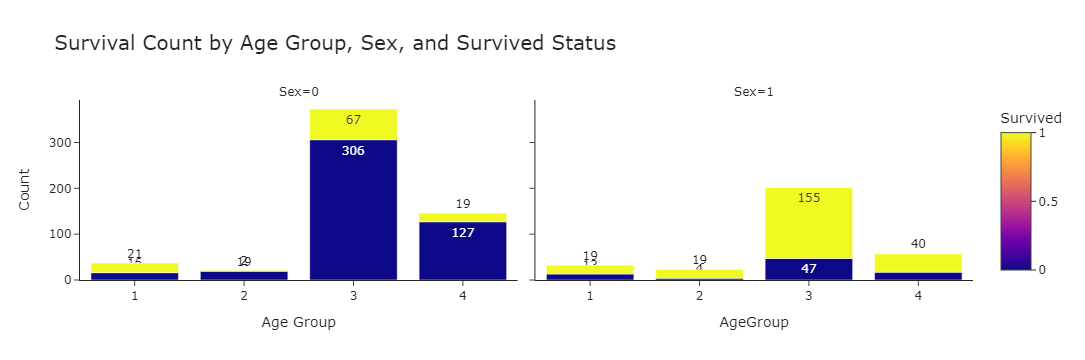

In [64]:

# Group the data by 'AgeGroup', 'Sex', and 'Survived' and count the occurrences
grouped_data = df_titanic.groupby(['AgeGroup', 'Sex', 'Survived']).size().reset_index(name='Count')

# Create a bar plot with Plotly to visualize the relationship
fig = px.bar(grouped_data,
             x='AgeGroup',
             y='Count',
             color='Survived',
             facet_col='Sex',  # Split the data by 'Sex'
             barmode='group',   # Group the bars for each 'Survived' status
             text='Count',      # Display the count on the bars
             title='Survival Count by Age Group, Sex, and Survived Status')

# Customize the layout for better visualization
fig.update_layout(
    xaxis_title="Age Group",
    yaxis_title="Count",
    title_font_size=20,
    template="simple_white"
)

# Show the figure
fig.show()


**Notes from the figure:**
1. male and femals have more adult as an age group.
2. male have more seniors.

# XGBoost Model

## labeling X, y

In [65]:
df_titanic.head()

PassengerId  Survived  Pclass  Sex    Age   Fare  Embarked  FamilySize  \
0            1         0       3    0 22.000  7.250         0           2   
1            2         1       1    1 38.000 71.283         1           2   
2            3         1       3    1 26.000  7.925         0           1   
3            4         1       1    1 35.000 53.100         0           2   
4            5         0       3    0 35.000  8.050         0           1   

   IsAlone Title  FarePerPerson  Pclass_Fare  Deck Sex_Pclass  \
0        0    Mr          3.625       21.750     0     male_3   
1        0   Mrs         35.642       71.283     3   female_1   
2        1  Miss          7.925       23.775     0   female_3   
3        0   Mrs         26.550       53.100     3   female_1   
4        1    Mr          8.050       24.150     0     male_3   

   TicketGroupSize  AgeGroup  
0                1         3  
1                1         3  
2                1         3  
3                2         3  
4                1         3

In [66]:
X = df_titanic[["Pclass", "Sex", "Age", "Fare", "Embarked","FamilySize","IsAlone", "Deck", "AgeGroup"]]
y = df_titanic["Survived"]

## Train | Test Split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling

In [68]:
XGB_model = XGBClassifier(random_state= 42).fit(X_train, y_train)

In [69]:
#let's make a function to give us the evaluation method

def eval_metric(model, X_train, y_train, X_test, y_test):
    # Predict the labels for the training set
    y_train_pred = model.predict(X_train)

    # Predict the labels for the test set
    y_pred = model.predict(X_test)

    # Display the confusion matrix and classification report for the test set
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))  # Confusion matrix for test set
    print(classification_report(y_test, y_pred))  # Classification report for test set
    print()

    # Display the confusion matrix and classification report for the training set
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))  # Confusion matrix for training set
    print(classification_report(y_train, y_train_pred))  # Classification report for training set

## model evaluation

In [70]:
eval_metric(XGB_model, X_train, y_train, X_test, y_test)

Test_Set
[[91 14]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179


Train_Set
[[441   3]
 [ 17 251]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       444
           1       0.99      0.94      0.96       268

    accuracy                           0.97       712
   macro avg       0.98      0.96      0.97       712
weighted avg       0.97      0.97      0.97       712



In [71]:
# Prediction for test and training sets
y_pred = XGB_model.predict(X_test)  # Predict the target values for the test set
y_pred_train = XGB_model.predict(X_train)  # Predict the target values for the training set

# Evaluating the Model Performance Scores using Accuracy
XGB_accuracy_test = accuracy_score(y_test, y_pred)  # Calculate accuracy for the test set
XGB_accuracy_train = accuracy_score(y_train, y_pred_train)  # Calculate accuracy for the training set
print('XGB_accuracy_test:', XGB_accuracy_test)
print('XGB_accuracy_train:', XGB_accuracy_train)

# Evaluating the Model Performance Scores using F1 Score
XGB_f1_test = f1_score(y_test, y_pred, average='macro')  # Calculate the F1 score for the test set (macro-averaged)
XGB_f1_train = f1_score(y_train, y_pred_train, average='macro')  # Calculate the F1 score for the training set (macro-averaged)
print('XGB_f1_test:', XGB_f1_test)
print('XGB_f1_train:', XGB_f1_train)

# Evaluating the Model Performance Scores using Precision
XGB_precision_test = precision_score(y_test, y_pred, average='macro')  # Calculate precision for the test set (macro-averaged)
XGB_precision_train = precision_score(y_train, y_pred_train, average='macro')  # Calculate precision for the training set (macro-averaged)
print('XGB_precision_test:', XGB_precision_test)
print('XGB_precision_train:', XGB_precision_train)

XGB_accuracy_test: 0.8156424581005587
XGB_accuracy_train: 0.9719101123595506
XGB_f1_test: 0.807871198568873
XGB_f1_train: 0.9697564373762859
XGB_precision_test: 0.8121870882740447
XGB_precision_train: 0.9755355362239109


In [72]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[91 14]
 [19 55]]

True Positives(TP) =  91

True Negatives(TN) =  55

False Positives(FP) =  14

False Negatives(FN) =  19


## Cross validation to the base model

In [73]:
# Cross Validation Scores of the Model Performance

model =  XGBClassifier(random_state= 42)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_accuracy           0.799
train_accuracy          0.981
test_precision_macro    0.788
train_precision_macro   0.983
test_recall_macro       0.780
train_recall_macro      0.976
test_f1_macro           0.783
train_f1_macro          0.979
dtype: float64

## Hyperparameters - Gridsearch

In [74]:
XGB_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [76]:
# Initialize the Decision Tree Classifier
model = XGBClassifier(random_state= 42)

# Define the hyperparameter space to be explored in GridSearch
param_grid = {
    "n_estimators": [50, 100, 200],
    'max_depth': [3, 4, 5],
    "learning_rate": [0.1, 0.2],
    "subsample": [0.5, 0.8, 1],
    "colsample_bytree": [0.5, 0.7, 1]
}
xgb_grid = RandomizedSearchCV(model,
                        param_grid,
                        scoring="accuracy",
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True).fit(X_train, y_train)

In [77]:
xgb_grid.best_params_

{'subsample': 0.5,
 'n_estimators': 100,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 0.5}

In [78]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [79]:
xgb_grid.best_index_

9

In [81]:
pd.DataFrame(xgb_grid.cv_results_).loc[9, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.830
mean_train_score   0.905
Name: 9, dtype: object

In [82]:
xgb_grid.best_score_

0.8300665101721441

## Evaluate the model with the best hyperparameters

In [84]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[90 15]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179


Train_Set
[[428  16]
 [ 53 215]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       444
           1       0.93      0.80      0.86       268

    accuracy                           0.90       712
   macro avg       0.91      0.88      0.89       712
weighted avg       0.91      0.90      0.90       712



In [86]:
# Define the Decision Tree model within a pipeline
# using the best hyperparameters and define our model with it
operations = [("xgb_grid",
               XGBClassifier(
                   subsample = 0.5,
                   n_estimators = 100,
                   max_depth=5,
                   learning_rate=0.1,
                   colsample_bytree = 0.5))]

# Define the evaluation metrics for model performance
scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"]  # Evaluating on multiple metrics

# Create the pipeline using the defined operations
model = Pipeline(steps=operations)

# Perform cross-validation
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)

# Convert the results into a DataFrame for easier interpretation
df_scores = pd.DataFrame(scores, index=range(1, 11))

# Calculate and display the average test metrics (ignoring the first two columns which are fit times)
df_scores.mean()[2:]


test_accuracy           0.833
train_accuracy          0.901
test_precision_micro    0.833
train_precision_micro   0.901
test_recall_micro       0.833
train_recall_micro      0.901
test_f1_micro           0.833
train_f1_micro          0.901
dtype: float64

Our basic (vanilla) model: 

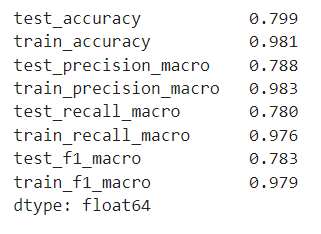

from the results above we can see that the new model has a better results as a more accurate to predict the survaving rate